<h2 style="text-align:center;">k-NEAREST NEIGHBORS</h2>
<br>

- The k-Nearest Neighbors algorithm (k-NN) works on the principle of distance fucntions for a given pair of points.
- It an instance based machine learning algorithm(Supervised learning).It is very important and non-parametric algorithm in nature.
- The k-NN algorithm is arguably the simplest machine learning algorithm.
- In k-Nearest neighbor classifier, k is an integer greater than zero.This is a simple classification technique used to find the k, nearest datapoints in a dataset to a given data point.
- The biggest challenge with this classifier is to find out the optimal value for k which depends on the data.
- k-NN uses all the features for computing the distance and because of this compleity for searching the nearest neighbors increases, which is the major drawbacks, since all the attributes or features in the dataset may not be very significant.
- Thus, providing certain weights to them based on significance, may increase the classifier accuracy.
- Building the model consists only of storing the training dataset.To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset--its "nearest neighbors"


<h4>Note:</h4>

- In case where k=1, it is called the nearest neighbor classifier.

- Let's X = <i>(x<sub>1</sub>,x<sub>2</sub>...x<sub>n</sub>)</i> be the predicted points, then given a point a = <i>(a<sub>1</sub>,a<sub>2</sub>...a<sub>n</sub>)</i>,
- We identify k observations in the training dataset that are similar to a.
- Neighbors are defined by a distances that we calculate between observations based on the independent variables.
- There are various ways where we can calculate the distance between the points:
- One of them is the **Euclidiean distance**.

<br>

<h3 style="text-align:center;"> <i>d</i> = <span>&radic;[(x<sub>1</sub>-a<sub>1</sub>)<sup>2</sup>+(x<sub>2</sub>-a<sub>2</sub>)<sup>2</sup>+...(x<sub>n</sub>-a<sub>n</sub>)<sup>2</sup>]</span></h3>
    
<br>

- Euclidian distance metric works well when the data set has "compact" or"isolated" clusters. 
- Euclidean distance is chosen primarily because its interpretation is straightforward.

- For each n-dimensional object, the Euclidean distances between the specified object and all training data objects are calculate and the specified object is assigned the class label that most of the k closest training data 
- Instead of considering only the closest neghbor, we can also consider an arbitrary number , k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from.
- When considering more than one neighbor, we use *voting* to assign a label.
-This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. 
- We then assign the class that is more frequent: in other words, the majority class among the k-nearest neighbors. 

<br>
<h3> Implementation concept</h3>
<br>
-Two ways of implementing k-nearest neighbors are 
   <ul>
    <li>normal python library</li>
    <li>Scikit learn library</ul>
   </ul>
   
 <h4>Algorithm</h4>
- The KNN classifier is constructed and accuracy is evaluated using EDM Data mining tool. 
 
 <b>input:</b>
- Training samples, test set of samples and the attribute-list.<br>
<b>Output:</b> Accuracy of KNN classifier.

 <b>Method</b>
    <li>Determine parameter K, the number of nearest neighbors</li>
    <li>For each case in the target data set that is the set to be               predicted, locate the K closest members (the K nearest neighbors) of the training data set. An Euclidean Distance measure is used to calculate how close each member of the training set is to the target row that is being examined.</li>
    <li>Sort the distance and determine nearest neighbors based on   the K-th minimum distance</li>
    <li>Gather the categories of the nearest neighbors</li>
    <li>Use simple majority of the category of nearest neighbors as the prediction value of the new query instance</li>
    <li>Repeat this procedure for the remaining cases in the target set.</li>
    

<h3>Normal python library</h3>

In [1]:

import numpy as np
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
from collections import Counter
import warnings

In [2]:
dataset = {"K":[[1,2],[2,1],[2,3],[4,5]],
           "R":[[6,7],[7,6],[6,8],[9,10]]}

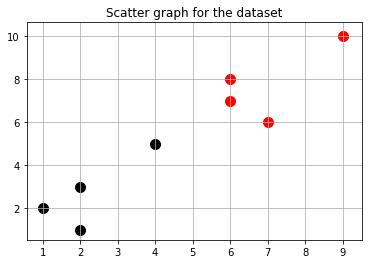

In [3]:
#visualize the dataset
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],color=i,s=100)
        

plt.title("Scatter graph for the dataset")
plt.grid(True)
plt.show()
    

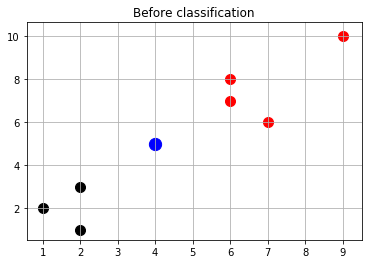

In [4]:
#provided the new datapoint 
new_datapoint = [4,5]


for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],color=i,s=100)
plt.scatter(new_datapoint[0],new_datapoint[1],color='b',
            s=150)        

plt.title("Before classification")
plt.grid(True)
plt.show()
    

In [5]:
# define a function to perform KNNClassification
import math
def KNNClassifier(data,new_data,k=3):
    if len(data)>= k:
        warnings.warn("K can not be less than number of voting groups")
        
    distances = []    
    for group in data:
        for features in data[group]:
                #calculate the euclidean distance
                
            #euclidean_distance = 
#             sqrt(pow((features[0]-new_data[0]),2)+
            #                 pow((features[1]-new_data[1]),2))
            
            # we can calculate distance using norm from numpy
            euclidean_distance = np.linalg.norm(np.array(features)
                                                -np.array(new_data))
            distances.append([euclidean_distance,group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [6]:
result = KNNClassifier(dataset,new_datapoint,k=3)
print("The new data point belongs to class : ",result)

[('K', 2)]
The new data point belongs to class :  K


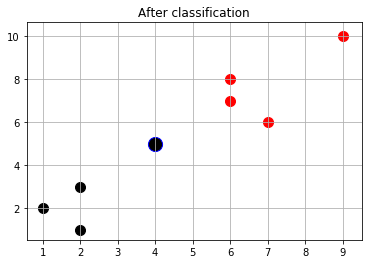

In [7]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],color=i,s=100)
plt.scatter(new_datapoint[0],new_datapoint[1],
            color=result,edgecolors='b',s=200,)        

plt.title("After classification")
plt.grid(True)
plt.show()

<br>
<h3>Using SciKit Learn Library</h3>
<br>
-For this library we using <b>KNeighborsClassifier</b> to biulding model 

In [8]:

X = [[1,2],[2,1],[2,3],[4,5],[6,7],[7,6],[6,8],[9,10]]
y = [0,0,0,0,1,1,1,1]    #K=0, R = 1 

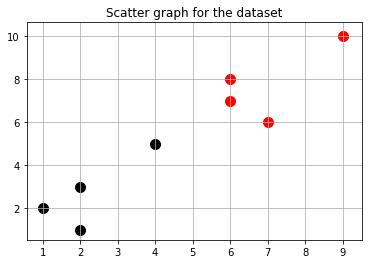

In [9]:
   #visualize the dataset
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],color=i,s=100)
        
plt.title("Scatter graph for the dataset")
plt.grid(True)
plt.show()
    

In [10]:
#import KNNClassifier class
from sklearn.neighbors import KNeighborsClassifier
#create an instance of the class
model = KNeighborsClassifier(n_neighbors=3)
#fit the model 
model.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
model.classes_

array([0, 1])

In [12]:
new_datapoint= [[6,5]]
prediction = model.predict(new_datapoint)

In [13]:
print("Model prediction : ",prediction)

Model prediction :  [1]


In [21]:
#measure accuracy

test = [[8,7],[3,2],[4,1],[4,1],[5,9],[7,8]]
test_labels = [1,0,0,0,1,1]

In [22]:
print("Predictions : ",model.predict(test))

Predictions :  [1 0 0 0 1 1]


In [23]:
print("Model accuracy : ",model.score(test,test_labels))

Model accuracy :  1.0
